In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step1 : Loading and describing Data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Dependent variable :--> 
        Attrition (Yes/No) - Binary Classification Problem 

#### Independent variable :--> 
       # 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       #'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       #'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       #'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       #'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       #'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       #'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       #'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       #'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       #'YearsWithCurrManager'

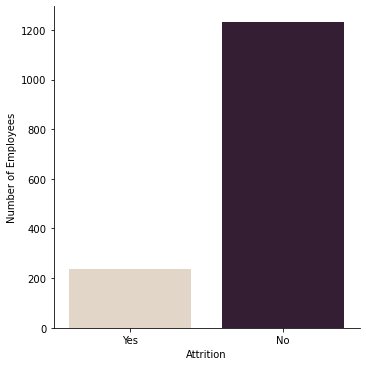

In [7]:
#plot for attrition

ax= sns.catplot(x="Attrition", kind="count", palette="ch:.25",data=df)
ax.set(xlabel="Attrition",ylabel="Number of Employees")
plt.show()

## Step 2: Preprocessing the data

In [8]:
# checking if any missing values
df.isnull().sum()*100/len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

- No missing value in dataset

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Step 3 : Feature Engineering

- The numeric and categorical fields need to be treated separately.The following few steps separate the numeric and categorical fields and drops the target field 'Attrition' from the feature set.

In [10]:
df.shape

(1470, 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
# check for numerical and categorical variables
df_numerical= pd.DataFrame(data=df.select_dtypes(include=["int64"]))
df_categorical= pd.DataFrame(data=df.select_dtypes(include=["object"]))
print("Shape of Numeric : ", df_numerical.shape)
print("Shape of Categorical : ", df_categorical.shape)

Shape of Numeric :  (1470, 26)
Shape of Categorical :  (1470, 9)


### 3.1 Encoding categorical variable (convert to dummy variable)

In [13]:
# encode only independent variables
df_categorical= df_categorical.drop(["Attrition"],axis=1)

#encode using get_dummies()
df_categorical_encoded=pd.get_dummies(df_categorical)
df_categorical_encoded.head(5)


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [14]:
print(df_categorical_encoded.shape)

(1470, 29)


### 3.2 Scaling Numeric variables

In [15]:
standard_scaler= StandardScaler()

In [16]:
df_num_scaled=standard_scaler.fit_transform(df_numerical)
df_num_scaled=pd.DataFrame(data=df_num_scaled,columns=df_numerical.columns,index=df_numerical.index)

In [17]:
df_num_scaled.shape

(1470, 26)

In [18]:
df_categorical_encoded.shape

(1470, 29)

In [19]:
#Combining the Categorical and Numeric features
df_transformed_final = pd.concat([df_num_scaled,df_categorical_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 55)


In [20]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

X = df_transformed_final #Features
y = target #Target

Shape of target:  (1470,)


### 3.3 Train test split

In [21]:
#Splitting into Train and Test dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0, stratify = y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1176, 55)
Shape of X Test:  (294, 55)
Shape of y Train:  (1176,)
Shape of y Test:  (294,)


## Step 4 : Model Fitting

# Adaboost Classifier
##### The most important parameters are base_estimator, n_estimators and learning_rate.

##### 1. base_estimator  - It is the learning algorithm to use to train the weak models. The default Learning Algorithm is DecisionTreeClassifier with Max Depth of 1

#####  2. n_estimators - It is the number of models to iteratively train.

#####  3.learning_rate - It is the contribution of each model to the weights and default value for it is 1. There is a trade-off between learning_rate and n_estimators. Reducing the learning rate will forcing the model train slower (but sometimes resulting in better performance scores). Decreasing the learning rate L makes the coefficients α_m smaller, which reduces the amplitude of the sample_weights at each step (As per weight formula we use at each step for updating weights). 

## Model 1: Default Model

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [24]:
adaboost_default = AdaBoostClassifier(random_state=100) # default 
adaboost_default.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 100}

In [25]:
#Fitting Model
adaboost_default.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [26]:
# Get our predictions
adaboost_predictions = adaboost_default.predict(X_test)

In [27]:
adaboost_predictions_prob = adaboost_default.predict_proba(X_test)
adaboost_predictions_prob

array([[0.53546703, 0.46453297],
       [0.52084492, 0.47915508],
       [0.51000703, 0.48999297],
       [0.51585199, 0.48414801],
       [0.52318135, 0.47681865],
       [0.50804497, 0.49195503],
       [0.50234071, 0.49765929],
       [0.51525919, 0.48474081],
       [0.5162771 , 0.4837229 ],
       [0.53130288, 0.46869712],
       [0.50376476, 0.49623524],
       [0.53135968, 0.46864032],
       [0.52691044, 0.47308956],
       [0.51122859, 0.48877141],
       [0.49489129, 0.50510871],
       [0.5067925 , 0.4932075 ],
       [0.51028642, 0.48971358],
       [0.50943269, 0.49056731],
       [0.5199305 , 0.4800695 ],
       [0.52460331, 0.47539669],
       [0.51976781, 0.48023219],
       [0.52002757, 0.47997243],
       [0.51683187, 0.48316813],
       [0.54549157, 0.45450843],
       [0.52402767, 0.47597233],
       [0.4998677 , 0.5001323 ],
       [0.50121291, 0.49878709],
       [0.50697132, 0.49302868],
       [0.51001958, 0.48998042],
       [0.52984679, 0.47015321],
       [0.

In [28]:
accuracy_score(y_test, adaboost_predictions)

0.8809523809523809

In [29]:
evaluate_model(adaboost_default)

Train Accuracy : 0.9141156462585034
Train Confusion Matrix:
[[966  20]
 [ 81 109]]
--------------------------------------------------
Test Accuracy : 0.8809523809523809
Test Confusion Matrix:
[[241   6]
 [ 29  18]]


## Model 2 -- With random parameter

In [30]:
#Using adaBoosting to predict 'Attrition' 
adaboost =  AdaBoostClassifier(n_estimators= 500,learning_rate=0.2,random_state=100)


# No of Models 

# from sklearn.ensemble.AdaBoost
# Accuracy or AUC is chagin with no of Model ( Weak Models )

In [31]:
#Fitting Model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=500, random_state=100)

In [32]:
#pred
y_pred = adaboost.predict(X_test)

In [33]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.8673469387755102


In [34]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[241   6]
 [ 33  14]]


In [35]:
evaluate_model(adaboost)

Train Accuracy : 0.9141156462585034
Train Confusion Matrix:
[[973  13]
 [ 88 102]]
--------------------------------------------------
Test Accuracy : 0.8673469387755102
Test Confusion Matrix:
[[241   6]
 [ 33  14]]


## Hypertunning parameter using GridSearch CV

## Model 3

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid based on the results of random search 


params = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [38]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [39]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=ab, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [40]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
CPU times: user 3.36 s, sys: 196 ms, total: 3.56 s
Wall time: 1min 38s


GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy', verbose=1)

In [41]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_base_estimator__min_samples_leaf,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050378,0.011310,0.006882,0.002733,2,5,0.01,10,"{'base_estimator__max_depth': 2, 'base_estimat...",0.853741,0.836735,0.853741,0.846939,0.847789,0.006960,39
1,0.168284,0.003464,0.008605,0.002940,2,5,0.01,50,"{'base_estimator__max_depth': 2, 'base_estimat...",0.853741,0.843537,0.853741,0.846939,0.849490,0.004418,30
2,0.826366,0.016664,0.039442,0.004828,2,5,0.01,250,"{'base_estimator__max_depth': 2, 'base_estimat...",0.846939,0.853741,0.863946,0.846939,0.852891,0.006960,14
3,3.299372,0.014958,0.134983,0.005649,2,5,0.01,1000,"{'base_estimator__max_depth': 2, 'base_estimat...",0.850340,0.870748,0.870748,0.853741,0.861395,0.009431,3
4,0.038346,0.001715,0.003849,0.002056,2,5,0.1,10,"{'base_estimator__max_depth': 2, 'base_estimat...",0.850340,0.846939,0.853741,0.850340,0.850340,0.002405,27


In [42]:
grid_search.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=10),
                   learning_rate=0.01, n_estimators=1000)

In [43]:
Adaboost_best = grid_search.best_estimator_

In [44]:
evaluate_model(Adaboost_best)

Train Accuracy : 0.8979591836734694
Train Confusion Matrix:
[[984   2]
 [118  72]]
--------------------------------------------------
Test Accuracy : 0.8707482993197279
Test Confusion Matrix:
[[247   0]
 [ 38   9]]


In [45]:
print(classification_report(y_test, Adaboost_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       1.00      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.93      0.60      0.62       294
weighted avg       0.89      0.87      0.83       294



## Observation:

### Model 1 (default):

- Train Accuracy : 0.9141156462585034
- Train Confusion Matrix:<br>
 `[[966     20]<br>
  [ 81     109]]'
--------------------------------------------------
- Test Accuracy : 0.8809523809523809
- Test Confusion Matrix:<br>
`[[241      6] ' <br>
 '[ 29     18]]'


### Model 2 (default):

- Train Accuracy : 0.9141156462585034
- Train Confusion Matrix:<br>
 [[973    13]<br>
 [ 88    102]]
--------------------------------------------------
- Test Accuracy : 0.8673469387755102
- Test Confusion Matrix:<br>
[[241     6]<br>
 [ 33    14]]
 
 

## Model 3 (Hypertunning parameter using GridSearchCV)

- Train Accuracy : 0.8979591836734694
 - Train Confusion Matrix:<br>
[[984     2]<br>
 [118    72]]
--------------------------------------------------
- Test Accuracy : 0.8707482993197279
- Test Confusion Matrix:<br>
[[247     0]<br>
 [ 38     9]]